In [1]:
%matplotlib inline

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks
from glob import glob

In [36]:
""" short time fourier transform of audio signal 
Args:
    sig: single channel wave stream.
    overlap: fraction of overlap between nearby windows
"""
def stft(sig, frameSize, overlap=0.5, window=np.hanning):
    assert len(np.shape(sig)) == 1, 'data need to be single channel.'
    
    win = window(frameSize)
    stride = int(frameSize - np.floor(overlap * frameSize))
    samples = np.append(np.zeros(np.floor(frameSize/2.0)), sig)    
    cols = np.ceil( (len(samples) - frameSize) / float(stride)) + 1
    samples = np.append(samples, np.zeros(frameSize))
    
    frames = stride_tricks.as_strided(samples, 
                                      shape=(cols, frameSize), 
                                      strides=(samples.strides[0]*stride, 
                                               samples.strides[0])
                                     ).copy()
    frames *= win
    
    return np.fft.rfft(frames)   

In [25]:
waves = glob('../training_set/*.wav')

In [80]:
samplerates = []
tracks = []
for path in waves:
    samplerate, samples = wav.read(path)
    if (len(np.shape(samples)) > 1):
        tracks.append(samples[:, 0])
        samplerate /= int(np.shape(samples)[1])
    else:
        tracks.append(samples)
    samplerates.append(samplerate)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:482: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


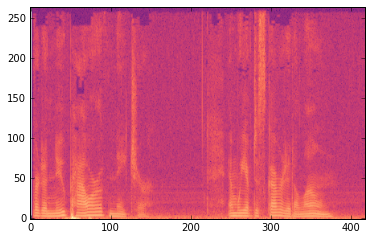

In [66]:
spectra = stft(tracks[1], frameSize=528)
plt.imshow(np.log(np.transpose(np.abs(spectra))), cmap="magma", origin='lower')

In [68]:
import IPython
IPython.display.Audio(waves[1])

In [79]:
bitrates = {}
for rate in samplerates:
    if rate in bitrates:
        bitrates[rate] += 1;
    else:
        bitrates[rate] = 1
print(bitrates)

{24000: 33, 48000: 1, 22050: 970, 44100: 31}


(0, 50000.0)

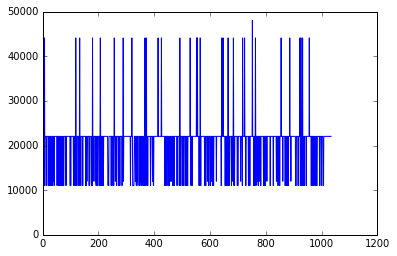

In [82]:
plt.plot(samplerates)
plt.ylim(0, 50e3)